# CS4035 - Cyber Data Analytics
## Lab 3 

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 3 contains 7 main questions, including the bonus. Write the code or explanation below each sub question. For the explantions, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) A PDF or a Word report for the assignment. Create a report from the plots, figures, tables and the write-up that you provide in this jupyter file. The report will be used as a proof for page limit. 
(iii) The libraries needed to run this file. 

Your peers should be able to use the readme section for instructions and be able to run this file. 

## Group Number :

## Student 1 
### Name : Arpita Ravindranath
### ID : 5002702

## Student 2
### Name : Menno Bezema
### ID : 4248252

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

We added a requirements.txt file, install all the requirements using pip install -r requirements.txt

containing:
- pandas
- numpy
- matplotlib
- sklearn
- yellowbrick
- zipfile
- nltk
- setuptools
- mmh3


### index (Easy navigation to sections)
This index also shows how our report is set up. We work through the questions in the assignments in order. The link to the question is the first cell in which we talk about that part (2a leads to the start of 2a).
1. [Familiarization and discretization task](#1)
    - [1a. Plot Visualizations](#1a)
    - [1b. Discretize selected features](#1b)
    - [1c. Answers and explanation](#1c)
2. [Frequent task](#2)
    - [2a. Use the SPACE SAVING Algorithm](#2a)
    - [2b. Analysis and answers to the questions](#2b)
3. [Sketching task](#3)
    - [3a. COUNT-MIN sketch](#3a)
    - [3b. Analysis and answers to the questions](#3b)
4. [Min-wise locality sensitive hashing task  task](#4)
    - [4a. Implementation](#4a)
    - [4b. Analysis and answers to the questions](#4b)
5. [Random hyperplane locality sensitive hashing task ](#5)
    - [5a. Implementation - locality sensitive hashing](#5a)
    - [5b. Analysis and answers to the questions. Also provide relevant plots](#5b)
6. [Botnet profiling task](#6)
    - [6a. Learn a sequential model.](#6a)
    - [6b. Analysis and answers to the questions.](#6b)
7. [Botnet fingerprinting task task](#7)
    - [7a. Fingerprinting.](#7a)
    - [7b. Analysis and answers to the questions.](#7b)
8. [Bonus](#8)

<a id='1'></a>

## 1. Familiarization and discretization task – 1 A4

# TODO: add titles to each plot

Familiarization and discretization task –1 A4
Consider scenario 10 from the CTU-13 data sets (see paper 4 from below resources). Remove all background flows from the data. 

	Assignment:
	1. You are to discretize the NetFlows (Apply the discretization to data from all hosts in the selected scenario). 
	2. Investigate the data from one of the infected hosts. 
	3. Select and visualize two features that you believe are most relevant for modeling the behavior of the infected host. (criteria: Shows the behavior of two features conditioned on the infection status.)
	4. Discretize these features using use any of the methods discussed in class (combine the two values into a single discrete value). (criteria: The discretization is sound, and the result investigated)
    
    Question:
	1. Do you observe any behavior in the two features that could be useful for detecting the infection? Explain and visualize. 


Find all entries that belong to the background flow by searching for the word background in the feature Label(Normal:CC:Background).When the data 'Label' feature is -1 then that flow does not belong to the background.This information will help to retrive non background flows in future.

In [44]:
import pandas as pd
import random
import numpy as np
import matplotlib.pylab as plt
import zipfile
import time
%matplotlib inline

def get_dataset_nr(dataset_number=None):
    
    # We work from a zipfile to keep memory low
    archive = zipfile.ZipFile('dataset_lab3.zip', 'r')
    
    if not dataset_number:
        for file in archive.namelist():
            if '9/capture20110817.binetflow' in file:
                data = pd.read_csv(archive.open(file))
            if 'binetflow' in file:
                new_all_data = pd.read_csv(archive.open(file))
                data.append(new_all_data)
    else:
        data = pd.read_csv(archive.open(f'dataset_{dataset_number}/capture20110818.binetflow'))

    # Find out which datapoints are background or not
    data.loc[:,'Label'] = data['Label'].str.find('Background')
    #Remove all background flows
    data_no_background = data[data['Label'] == -1]

    #convert the Proto,Dir,State features to numeric
    label_mapping = {}
    char_cols = ['Proto', 'Dir', 'State']
    for c in char_cols:
        data[c], label_mapping[c] = pd.factorize(data[c])
        data_no_background.loc[:,c], label_mapping[c] = pd.factorize(data_no_background[c])
    return data_no_background

data_no_background = get_dataset_nr(dataset_number=10)

C:\tools\Anaconda3\envs\Cyber Data analytics\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [5]:
#We obtain this information from the description of the CTU13 dataset
infected_hosts = ['147.32.84.165','147.32.84.191','147.32.84.192','147.32.84.193','147.32.84.204',
                  '147.32.84.205','147.32.84.206''147.32.84.207','147.32.84.208','147.32.84.209']

normal_hosts = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36, 147.32.80.9', '147.32.87.11']

In [567]:
#getting flows related to infected host 147.32.84.165(This is the infected host chosen for visualization and discretization)
#We choose all flows where the source or destination IP is 147.32.84.165
infected1 = data_no_background[data_no_background['SrcAddr'] == infected_hosts[0]]
infected2 = data_no_background[data_no_background['DstAddr'] == infected_hosts[0]]
frames = [infected1,infected2]
infected = pd.concat(frames)
#infected

In [568]:
#getting non infected flows.This is when the source IP or destination IP belong to the list of normal hosts
normal1 = data_no_background[data_no_background['SrcAddr'].isin(normal_hosts)]
normal2 = data_no_background[data_no_background['DstAddr'].isin(normal_hosts)]
frames = [normal1,normal2]
normal = pd.concat(frames)
#normal

In [569]:
#Print variation in the features to find the ones with the most deviations
print(f"Totpackets infected mean: {np.mean(infected['TotPkts'])} - std dev: {np.std(infected['TotPkts'])}")
print(f"Totpackets normal mean:   {np.mean(normal['TotPkts'])} - std dev: {np.std(normal['TotPkts'])}")

print(f"TotBytes infected mean: {np.mean(infected['TotBytes'])} - std dev: {np.std(infected['TotBytes'])}")
print(f"TotBytes normal mean:   {np.mean(normal['TotBytes'])} - std dev: {np.std(normal['TotBytes'])}")

print(f"SrcBytes infected mean: {np.mean(infected['SrcBytes'])} - std dev: { np.std(infected['SrcBytes'])}")
print(f"SrcBytes normal mean: {np.mean(normal['SrcBytes'])}   - std dev: { np.std(normal['SrcBytes'])}")

print(f"dTos infected mean: {np.mean(infected['dTos'])} - std dev: { np.std(infected['dTos'])}")
print(f"dTos normal mean: {np.mean(normal['dTos'])}   - std dev: { np.std(normal['dTos'])}")

print(f"sTos infected mean: {np.mean(infected['sTos'])} - std dev: { np.std(infected['sTos'])}")
print(f"sTos normal mean: {np.mean(normal['sTos'])}   - std dev: { np.std(normal['sTos'])}")

print(f"Proto infected mean: {np.mean(infected['Proto'])} - std dev: { np.std(infected['Proto'])}")
print(f"Proto normal mean: {np.mean(normal['Proto'])}   - std dev: { np.std(normal['Proto'])}")

print(f"State infected mean: {np.mean(infected['State'])} - std dev: { np.std(infected['State'])}")
print(f"State normal mean: {np.mean(normal['State'])}   - std dev: { np.std(normal['State'])}")

print(f"Dur infected mean: {np.mean(infected['Dur'])} - std dev: { np.std(infected['Dur'])}")
print(f"Dur normal mean: {np.mean(normal['Dur'])}   - std dev: { np.std(normal['Dur'])}")

print(f"Dir infected mean: {np.mean(infected['Dir'])} - std dev: { np.std(infected['Dir'])}")
print(f"Dir normal mean: {np.mean(normal['Dir'])}   - std dev: { np.std(normal['Dir'])}")

print(f"Label infected mean: {np.mean(infected['Label'])} - std dev: { np.std(infected['Label'])}")
print(f"Label normal mean: {np.mean(normal['Label'])}   - std dev: { np.std(normal['Label'])}")

Totpackets infected mean: 32.89696210460382 - std dev: 1833.7146960535513
Totpackets normal mean:   37.226810293237584 - std dev: 518.8540774153314
TotBytes infected mean: 29293.764484810523 - std dev: 1461313.1540915144
TotBytes normal mean:   28335.471706895405 - std dev: 481827.83026914933
SrcBytes infected mean: 29282.68159515607 - std dev: 1461313.238340825
SrcBytes normal mean: 1723.304275550236   - std dev: 18867.27067999337
dTos infected mean: 0.0 - std dev: 0.0
dTos normal mean: 0.0   - std dev: 0.0
sTos infected mean: 0.0 - std dev: 0.0
sTos normal mean: 0.0   - std dev: 0.0
Proto infected mean: 2.990186867105126 - std dev: 0.15053843076248655
Proto normal mean: 0.7424030853115233   - std dev: 0.690096440685234
State infected mean: 34.65340849775551 - std dev: 7.305306531516834
State normal mean: 6.370037901456214   - std dev: 12.24477111997051
Dur infected mean: 100.24288123415805 - std dev: 311.22619066767317
Dur normal mean: 39.79041246459206   - std dev: 258.6656079930228

Text(0, 0.5, 'Mean value')

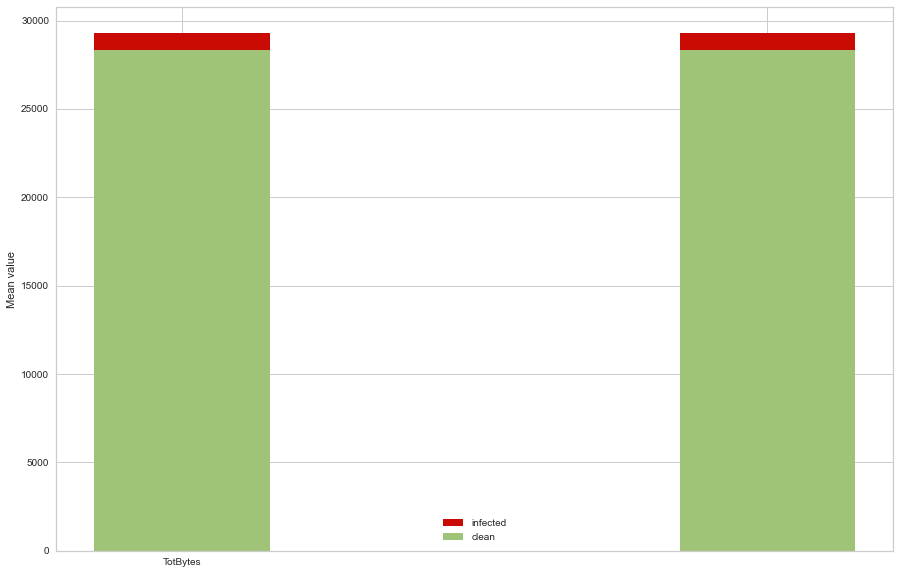

In [570]:
cols = ['TotBytes','SrcBytes','TotPkts', 'Dur','State', 'dTos','sTos', 'Proto', 'Dir','Label']

mean_infected = np.mean(infected[cols].values, axis=0)
std_infected = np.std(infected[cols].values, axis=0)

mean_clean = np.mean(normal[cols].values, axis=0)
std_clean = np.std(normal[cols].values, axis=0)


f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

ax.bar(range(2), height=mean_infected[:-9], width=0.3, color='r', label='infected')
ax.bar(range(2), height=mean_clean[:-9], width=0.3, color='g', label='clean')
ax.legend()
ax.set_xticks(range(2)) 
ax.set_xticklabels(cols[:-9], fontsize=10)
ax.set_ylabel('Mean value')

Text(0, 0.5, 'Mean value')

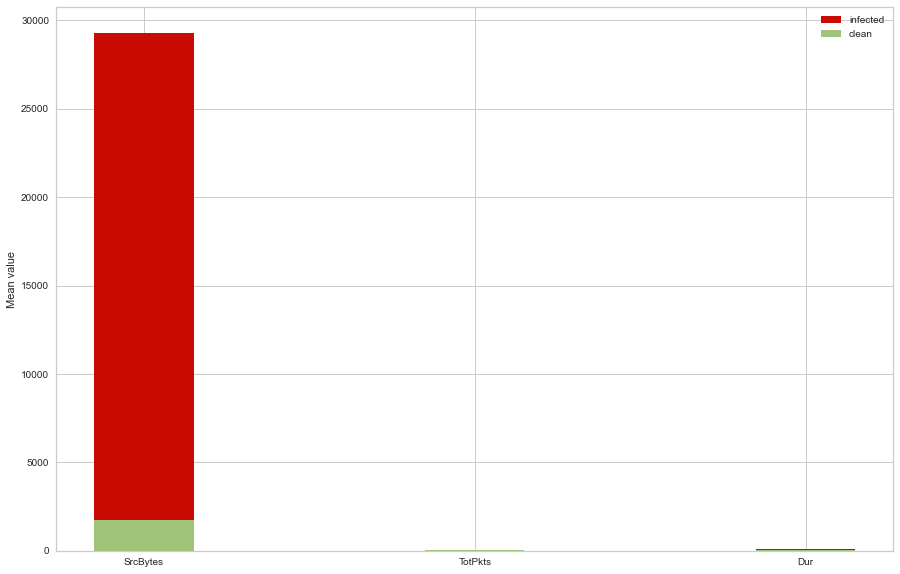

In [571]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

ax.bar(range(3),height=mean_infected[-9:-6],
          width=0.3, color='r', label='infected')
ax.bar(range(3), height=mean_clean[-9:-6], 
          width=0.3, color='g', label='clean')
ax.legend()
ax.set_xticks(range(3)) 
ax.set_xticklabels(cols[-9:-6], fontsize=10)
ax.set_ylabel('Mean value')

Text(0, 0.5, 'Mean value')

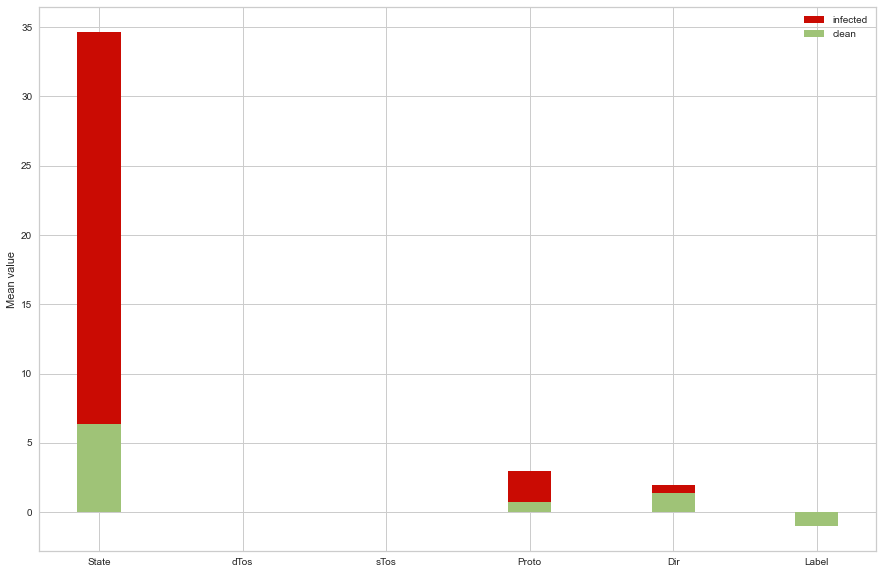

In [572]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,10))

ax.bar(range(6),height=mean_infected[-6:],
          width=0.3, color='r', label='infected')
ax.bar(range(6), height=mean_clean[-6:], 
          width=0.3, color='g', label='clean')
ax.legend()
ax.set_xticks(range(6)) 
ax.set_xticklabels(cols[-6:], fontsize=10)
ax.set_ylabel('Mean value')

<a id='1a'></a>

### 1a. Plot visualizations - Select and visualize two features for modeling the behavior of the infected host.
    
       Select and visualize two features that you believe are most relevant for modeling the behavior of the infected host. (criteria: Shows the behavior of two features conditioned on the infection status.)

From the above plots we see that Proto,SrcBytes,TotBytes,TotPkts and State seem to be the most important features.We further choose Proto and TotPkts as they vary largely between the clean and the infected flows



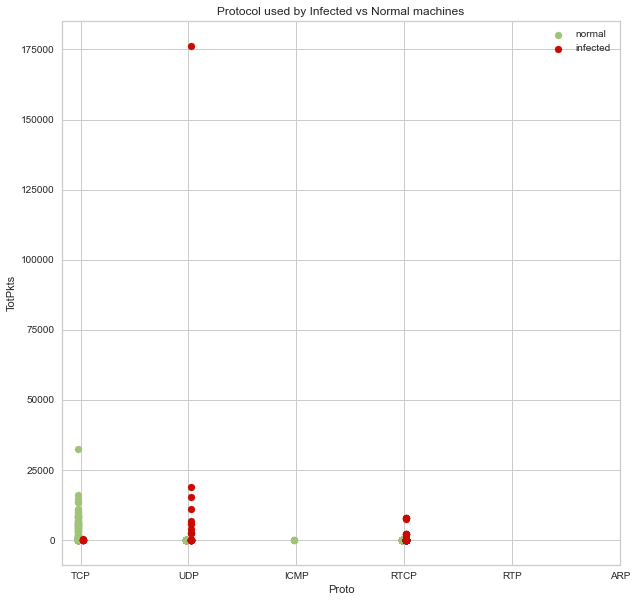

In [573]:
#Visualising these two features

plt.figure(figsize=(10,10))
plt.scatter(normal['Proto'].values-0.02, normal['TotPkts'].values, color='g', label='normal')
plt.scatter(infected['Proto'].values+0.02,infected['TotPkts'].values, color='r', label='infected')
plt.xlabel('Proto')
plt.ylabel('TotPkts')
plt.title('Protocol used by Infected vs Normal machines')
plt.xticks(range(6), ['TCP', 'UDP', 'ICMP','RTCP','RTP','ARP'])  #we get this from the mapping performed earlier
plt.legend()

<a id='1b'></a>

### 1b. Discretize selected features
    Discretize these features using use any of the methods discussed in class (combine the two values into a single discrete value). (criteria: The discretization is sound, and the result investigated)

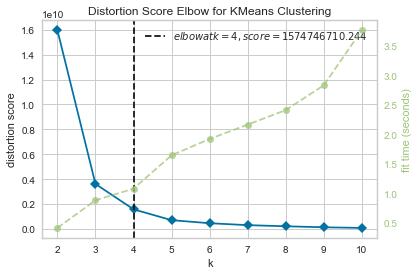

In [574]:
#Apllying Elbow method to find optimal number of clusters
val = data_no_background['TotPkts'].values
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model=KElbowVisualizer(KMeans(),k=10)
model.fit(val[...,np.newaxis])
model.show()

As the breakpoint is at cluster 4.Based on this we calculate the ordinal rank

We disctretize the TotPkts feature,the Protocol feature is already discrete in nature. 
We add a new feature 'Discrete_TotPkts' which corresponds to the discretized TotPkts feature. 
Then we combine these two - Protocol and discretized TotPkts feature.
For this step we make use of the algorithm mentioned in paper 4 (Learning Behavioral Fingerprints From NetflowsUsing Timed Automata)on page 311.
We Then looked into the possible differences that could be exploited in the extracted codes.

In [6]:
def discretize(val, ranks):

    ordinal_ranks = np.linspace(0, 1, ranks, endpoint=False) #based on ranks splitting to percentiles
    ordinal_ind = np.ceil(ordinal_ranks[1:] * len(val)) #leave out 0 and calculate p/100*N and round it off,the ordinal ranks
    ordinal_val = np.array(sorted(val))[ordinal_ind.astype(int)] #select the values at the percentiles for mapping
    disc = []
    for v in val:
        for i in range(len(ordinal_val)): #i takes values 0,1,2
            if v<=ordinal_val[i]:  #check val against all the ordinal boundary values
                disc.append(i)
                break
            if i==len(ordinal_val)-1:  #if its not lesser than any boundary then it is put into the last category
                disc.append(i+1)
    return np.array(disc)  #this contains the discretized values of the feature


def extract_code(values):
    M = np.zeros(values.shape[1])
    for j in range(values.shape[1]):
        M[j] = len(np.unique(values[:,j])) #Pulls   out all rows and only jth column,M is an array consisting of no of unique value for each feature
    spacesize = np.prod(M) #its the product of the no of values for each feature
    code = np.zeros(values.shape[0], dtype=int)
    for i in range(values.shape[0]):
        s = spacesize
        for j in range(values.shape[1]):
            code[i] += values[i,j] * s/M[j]
            s = s / M[j]
    return code


def get_discrete_tot_pkts(dataframe):
    data_no_background = dataframe.copy()
    # label_mapping
    # Get Values to discretize
    val = data_no_background['TotPkts'].values
    TotPkts_disc = discretize(val, 3)

    # add discretized values to the dataframe
    data_no_background.loc[:,'Discrete_TotPkts'] = TotPkts_disc

    # Generate a new column with all the code values
    data_to_discretize = data_no_background[['Proto', 'Discrete_TotPkts']].values # selects values of Proto and Discrete_Totpkts
    total_codes = extract_code(data_to_discretize)
    data_no_background.loc[:,'Proto_DiscreteTotPkts'] = total_codes.tolist()
    return data_no_background

To visualize the difference we make use of the normal flow data from the first normal host and compare it to the infected host data.

In [42]:
data_no_background = get_discrete_tot_pkts(data_no_background)

feat = ['Proto', 'Discrete_TotPkts']

# Select only values associated with the infected host we want to look at
infected_data = data_no_background[np.logical_or(data_no_background['SrcAddr']==infected_hosts[0], data_no_background['DstAddr']==infected_hosts[0])]
infected_data = infected_data[feat].values # selects values of Proto and Discrete_Totpkts
infected_code = extract_code(infected_data) # Convert the Proto and Discrete_Totpkts to a new code

# Get values from a normal host to compare
clean_data = data_no_background[np.logical_or(data_no_background['SrcAddr']==normal_hosts[0], data_no_background['DstAddr']==normal_hosts[0])][feat].values
test_code= extract_code(clean_data)

Text(0, 0.5, 'Extracted code')

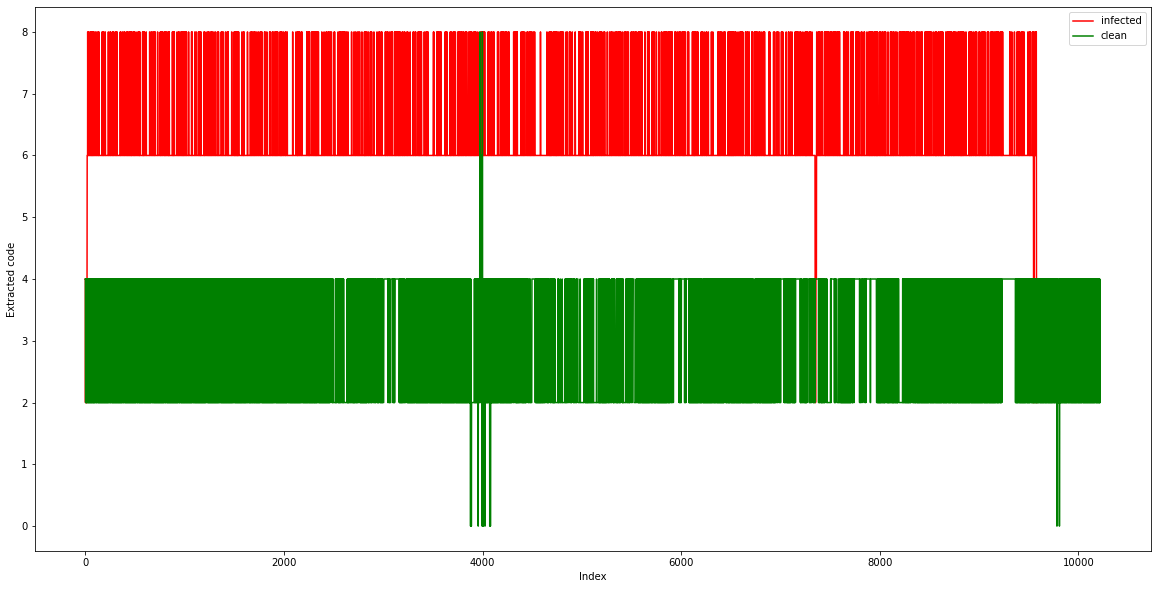

In [43]:
plt.figure(figsize=(20,10))
plt.plot(infected_code, color='r', label='infected')
plt.plot(test_code, color='g', label='clean')
plt.legend()
plt.xlabel("Index")
plt.ylabel("Extracted code")

<a id='1c'></a>

### 1b. Answers and explanation
Do you observe any behavior in the two features that could be useful for detecting the infection? Explain and visualize.

As seen in the above plots the infected data resulted in higher extracted code values, hence this could be used in classification of unseen data as infected or normal data. (This can further be used in task 5/6???)

<a id='2'></a>

## 2. Frequent task – 1/2 A4 (Individual)

Use the SPACE SAVING algorithm to estimate the distribution over 3-grams of discretised symbols. 

	1. Write code for the algorithm, use it to estimate the distribution in one pass (no need to actually stream the data, you may store it in memory, or run every file separately, but do store and load the intermediate results). 
	2. Use a range of number of counters. (criteria: explanations for the number of used counters/bin)
	3. What are the 10 most frequent 3-grams and their frequencies when approximated? 
	4. Use the theory to explain any approximation errors you observe. (criteria: The 3-gram count approximation is correct, and its quality is related to theory)

In [ ]:
# get dataset
data_no_background = get_dataset_nr(dataset_number=10)
data_no_background = get_discrete_tot_pkts (data_no_background)

In [578]:
from nltk import ngrams
from collections import Counter

def n_grams(n, data):
    gram = []
    for gr in ngrams(data, n):
        gram.append(''.join(gr))
    return gram

data1 = data_no_background[feat].values
series= extract_code(data1)

# Convert from numeric to characters
values = np.unique(series)
alphabet = 'abcdefghijklmnopqrstuvw'
dict1 = {x : alphabet[i]  for i, x in enumerate(values)}
list3 = [dict1[x] for x in series]

# Convert the list of characters to n_grams based on input parameter
n_gram = n_grams(3, list3)
    
unique,counts = np.unique(n_gram,return_counts=True)

In [579]:
#merging the list and displaying the top 30 frequent ngrams and their count
def mergelist(list1,list2):
    merged_list = [(list1[i],list2[i]) for i in range(0,len(list1))]
    return merged_list

def takesec(elem):
    return elem[1]

frequencies = mergelist(counts,unique)
print(*(sorted(frequencies,reverse = True)[:30]),sep = "\n")

(78946, 'ddd')
(8020, 'ded')
(7968, 'dde')
(7962, 'edd')
(3231, 'ccc')
(2938, 'ccb')
(2819, 'bcc')
(2434, 'cbc')
(1886, 'bbb')
(884, 'ede')
(826, 'eed')
(826, 'dee')
(568, 'cbb')
(554, 'bbc')
(322, 'eee')
(244, 'bdd')
(207, 'ddb')
(193, 'dbd')
(172, 'bcb')
(123, 'bbd')
(113, 'dbb')
(94, 'bdb')
(74, 'dcc')
(68, 'ecc')
(65, 'bee')
(64, 'cbe')
(56, 'eec')
(55, 'ddc')
(54, 'cbd')
(28, 'bdc')


<a id='2a'></a>

### 2a. Use the SPACE SAVING algorithm

    1. Write code for the algorithm, use it to estimate the distribution in one pass (no need to actually stream the data, you may store it in memory, or run every file separately, but do store and load the intermediate results). 
	2. Use a range of number of counters. (criteria: explanations for the number of used counters/bin)

In [582]:
#Space Saving algorithm implementation based on the paper http://www.cse.ust.hk/~raywong/comp5331/References/EfficientComputationOfFrequentAndTop-kElementsInDataStreams.pdf
import math, heapq

class SpaceSaving:
    def __init__(self, k):
        self.k = k
        self.n = 0
        self.counts = dict() #keeps track of k watched elements
        self.queue = []

    def inc(self, x):
        # increments the total number of elements seen
        self.n += 1

        # checks if x is being tracked,if yes the counter is incremented
        if x in self.counts:
            self.counts[x] += 1

        # x is not being watched
        else:
            # make room for x if the no of tracked elements are aldready k and x is not tracked
            if ((len(self.counts)) == self.k and self.n > self.k ):
                while True:
                    count, nval, key = self.dequeue()
                    assert self.counts[key] >= count #The value of the new elements count must be greater than equal to the counts in the tracked list
                    if self.counts[key] == count:
                        del self.counts[key] #removing element from the tracking list if its count is same as that of the new element
                        break
                    else:
                        self.enqueue(self.counts[key], nval, key) #else add the element back to the queue
            else:
                count = 0  #there is room to add x to the tracking list

            # track x
            self.counts[x] = count + 1
            self.enqueue(count, self.n, x)
        

    def enqueue(self, count, nval, key):
        heapq.heappush(
            self.queue,
            (count, nval, key)
        )

    def dequeue(self):
        return heapq.heappop(self.queue)



In [583]:
a = SpaceSaving(5)
for y in n_gram:
    a.inc(y)
    
sortedarr = sorted(a.counts.items(),key = lambda x:x[1],reverse = True)
for x in sortedarr:
    print(x)

('ddd', 80017)
('eee', 10558)
('ecc', 10541)
('ccb', 10541)
('eec', 10540)


In [584]:
a = SpaceSaving(15)
for y in n_gram:
    a.inc(y)
    
sortedarr = sorted(a.counts.items(),key = lambda x:x[1],reverse = True)
for x in sortedarr:
    print(x)

('ddd', 78947)
('ded', 8024)
('dde', 7971)
('edd', 7965)
('ccc', 3231)
('ccb', 2938)
('bcc', 2819)
('cbc', 2434)
('bbb', 1886)
('eee', 1078)
('bee', 982)
('eec', 981)
('ecc', 981)
('cbe', 981)
('ebe', 979)


In [585]:
a = SpaceSaving(20)
for y in n_gram:
    a.inc(y)

sortedarr = sorted(a.counts.items(),key = lambda x:x[1],reverse = True)
for x in sortedarr:
    print(x)

('ddd', 78946)
('ded', 8021)
('dde', 7969)
('edd', 7963)
('ccc', 3231)
('ccb', 2938)
('bcc', 2819)
('cbc', 2434)
('bbb', 1886)
('ede', 886)
('dee', 827)
('eed', 827)
('cbb', 568)
('bbc', 554)
('eee', 480)
('bee', 371)
('ecc', 370)
('cbe', 370)
('eec', 369)
('ebe', 368)


In [586]:
a = SpaceSaving(25)
for y in n_gram:
    a.inc(y)
    
sortedarr = sorted(a.counts.items(),key = lambda x:x[1],reverse = True)
for x in sortedarr:
    print(x)

('ddd', 78946)
('ded', 8020)
('dde', 7968)
('edd', 7962)
('ccc', 3231)
('ccb', 2938)
('bcc', 2819)
('cbc', 2434)
('bbb', 1886)
('ede', 885)
('dee', 826)
('eed', 826)
('cbb', 568)
('bbc', 554)
('eee', 356)
('bdd', 245)
('ddb', 213)
('dbd', 208)
('ecc', 192)
('bee', 192)
('cbe', 191)
('eec', 189)
('bcb', 186)
('beb', 181)
('ebe', 181)


In [587]:
a = SpaceSaving(30)
for y in n_gram:
    a.inc(y)
    
sortedarr = sorted(a.counts.items(),key = lambda x:x[1],reverse = True)
for x in sortedarr:
    print(x)

('ddd', 78946)
('ded', 8020)
('dde', 7968)
('edd', 7962)
('ccc', 3231)
('ccb', 2938)
('bcc', 2819)
('cbc', 2434)
('bbb', 1886)
('ede', 884)
('dee', 826)
('eed', 826)
('cbb', 568)
('bbc', 554)
('eee', 322)
('bdd', 244)
('ddb', 208)
('dbd', 193)
('bcb', 172)
('bbd', 125)
('ecc', 120)
('bee', 119)
('dbb', 118)
('cbe', 118)
('eec', 117)
('bdb', 105)
('ebe', 94)
('beb', 94)
('bec', 93)
('ecb', 93)


<a id='2b'></a>

### 2b. Analysis and answers to the questions

    3. What are the 10 most frequent 3-grams and their frequencies when approximated? 
	4. Use the theory to explain any approximation errors you observe. (criteria: The 3-gram count approximation is correct, and its quality is related to theory)


In [588]:
a = SpaceSaving(10)
for y in n_gram:
    a.inc(y)
    
sortedarr = sorted(a.counts.items(),key = lambda x:x[1],reverse = True)
for x in sortedarr:
    print(x)

('ddd', 78966)
('ded', 8131)
('dde', 8076)
('edd', 8070)
('ccc', 3670)
('eee', 3080)
('bee', 3051)
('eec', 3051)
('ecc', 3051)
('ccb', 3051)


From the above results we notice that the top 10 most frequent 3grams identified are not the exact same as that actually seen in the data.Frequent 3grams are associated with counters having bigger values,and they will not be affected by the ineffective hits of the lesser frequent elements.The infrequent 3grams will reside in the lesser value counters,these counter values grow much slower comparatively.Hence,these are more prone to errors.This is what we notice in the top 10 frequent 3grams we notice that the top5 have been identified correctly.Irrespective of data being skewed or not we see that the errors in counters is inversely proportional to the number of counters.This is due to the fact that when there are more number of counters there is a lesser chance of replacing 3grams and so there is lesser chance of overestimation and errors.This is supported by our results above.As we increase the value of the counter from 10 to 20 and 30 we notice that errors decrease.Counter-error pairs observed 5 counters - 4 errros,10 counters - 3 errors,15 counters - 5 errors ,20 counters - 5 errors,25 counters - 4 errors ,30 counters - 5 errors.

<a id='3'></a>

## 3. Sketching task – 1/2 A4 (Individual)
Build code for computing a COUNT-MIN sketch to estimate occurrence counts for the 3-grams. Make sure the hash functions are pairwise independent. 

	1. Estimate the distribution in one pass (no need to actually stream the data, you may store it in memory, or run every file separately, but do store and load the intermediate results). 
	2.	Play with different heights and widths for the COUNT-MIN sketch matrix. (criteria: explanations for the number of used counters/bin) 
	3.	What are the 10 most frequent 3-gramsand their frequencies when approximated? 
	4.	Use the theory to explain any approximation errors you observe. (criteria: The 3-gram count approximation is correct, and its quality is related to theory)


In [ ]:
# get dataset
data_no_background = get_dataset_nr(dataset_number=10)
data_no_background = get_discrete_tot_pkts (data_no_background)

<a id='3a'></a>

### 3a. COUNT-MIN sketch

    1. Estimate the distribution in one pass (no need to actually stream the data, you may store it in memory, or run every file separately, but do store and load the intermediate results). 
	2.	Play with different heights and widths for the COUNT-MIN sketch matrix. (criteria: explanations for the number of used counters/bin) 

In [589]:
#Impelmentation of count min sketch
import pandas as pd
import pickle
import numpy as np
import mmh3
import sys

def count_min_sketch(series, width, depth):
    
    n = len(series)
    
    # Initialize the sketch matrix and a depth(no of hashes)*width matrix
    sketch = np.zeros( (depth, width) )
    
    # Generating the seeds for the hash functions(depth = no of diff hash functions),the seeds are just 0 to the no of hashes-1
    seeds = list(range(depth))
    #print("seeds",seeds)
    uniqexcode = set() # Unordered collections of unique elements
   
    # Process extended code
    for x in series:
        
        # Add extended code to unique extended code set
        uniqexcode.add(x) #will not add the element if it is already present in the set
        
        # For each hash function
        for i in range(depth):
            
            # Hash extended code and increment cell in matrix
            idx = mmh3.hash(x, seeds[i]) % width
            sketch[i, idx] += 1
        

   
    # Initialize result series
    result = pd.Series(0, index=uniqexcode)
    
    # Calculate estimates
    for x in uniqexcode:
        
        min_est = n
        
        # For each hash function
        for i in range(depth):
            
            # Hash extended code and update min_count if less than already found
            idx = mmh3.hash(x, seeds[i]) % width
            val = sketch[i, idx]
            if val < min_est: 
                min_est = val
        
        result.at[x] = min_est
    
    return result.sort_values(ascending=False) #returns in descending order


ModuleNotFoundError: No module named 'mmh3'

<a id='3b'></a>

In [61]:
from itertools import product

widths = [5, 10, 15, 20, 50]
depths = [2, 5, 8, 10, 20, 50]

grid = list(product(widths, depths))

In [62]:
freqtable = pd.DataFrame()

for width, depth in grid:
    freqtable['%d_%d' % (width,depth)] = count_min_sketch(n_gram, width, depth)

In [63]:
with pd.option_context('display.max_columns', 100):
    with pd.option_context("display.float_format", '{:.2f}'.format):
        display(freqtable.head(10))

,5_2,5_5,5_8,5_10,5_20,5_50,10_2,10_5,10_8,10_10,10_20,10_50,15_2,15_5,15_8,15_10,15_20,15_50,20_2,20_5,20_8,20_10,20_20,20_50,50_2,50_5,50_8,50_10,50_20,50_50
bbd,84961,11605,5429,1702,1572,420,79457,298,298,180,180,139,679,679,679,163,163,126,451,158,158,158,123,123,151,123,123,123,123,123
bba,84961,1175,648,648,648,648,109,109,109,109,69,43,679,96,96,96,68,14,69,4,4,4,3,3,6,3,3,3,3,3
deb,84961,9516,648,648,92,92,5504,1478,245,245,47,47,679,679,36,36,20,20,60,35,35,35,20,20,199,20,20,17,17,17
eec,84961,3160,648,648,648,436,109,109,109,109,109,109,823,823,132,57,57,57,69,58,58,58,57,57,58,56,56,56,56,56
dec,84961,1175,1175,1175,982,190,109,45,45,45,45,6,11,11,11,11,11,11,69,43,43,43,22,6,34,11,6,6,6,6
aac,84961,2585,648,648,648,436,109,109,109,109,69,62,679,95,36,36,36,13,60,60,18,18,2,1,49,3,3,3,1,1
ddd,84961,79307,79307,79307,79307,79122,79457,79009,79009,79009,79009,78961,79906,79118,78950,78950,78950,78947,79006,78981,78979,78948,78948,78948,79071,78946,78946,78946,78946,78946
bdc,84961,3160,2529,1702,1572,694,5504,2806,738,180,69,36,679,59,59,59,32,32,5444,28,28,28,28,28,93,28,28,28,28,28
dcc,22410,4442,4442,4442,1153,694,5504,948,948,948,109,95,679,96,96,91,91,84,210,210,92,92,74,74,81,77,76,74,74,74
ebe,22410,12753,1155,1155,1153,711,5504,298,298,298,151,31,1927,130,36,36,36,16,269,165,165,160,26,13,814,12,12,12,12,12


### 3b. Analysis and answers to the questions

    3.	What are the 10 most frequent 3-grams and their frequencies when approximated? 
	4.	Use the theory to explain any approximation errors you observe. (criteria: The 3-gram count approximation is correct, and its quality is related to theory)


In [64]:
#Based on sketch accuracy(page 4) in the paper http://dimacs.rutgers.edu/~graham/pubs/papers/cmsoft.pdf
error     = .01  # Error of at most 0.01
certainty = .999 # with 99.9% certainty
optimal = pd.DataFrame()
w = math.ceil(2 / error)
d = math.ceil(np.log(1 - certainty) / np.log(1/2))
optimal['cm_%d_%d' % (w,d)] = count_min_sketch(n_gram, w, d)
print("w,d",w,d)

w,d 200 10


In [65]:
with pd.option_context('display.max_columns', 1000):
    display(optimal.head(10))

,cm_200_10
ddd,78946
ded,8020
dde,7968
edd,7962
ccc,3231
ccb,2938
bcc,2819
cbc,2434
bbb,1886
ede,884


The above table is the 10 most frequent 3grams based on the count min-sketch algorithm.Since the value for the width and depth were optimized we notice that these 10 3grams coincide with the actual 10 most frequent 3grams in the dataset.When the value of w is very small there will be more no of hash collisions.As mentioned in the paper this translates into a expected fraction of weight colliding with i being at most N/w. In some cases, the colliding weight will be less than this; in other cases  the colliding weight will be more.Tthe hash functions  per row are different each time, they give a different mapping of an item to counters, and so a different collection of items collide with i in each row.So we need a good approximation of both values to ensure minimal collisions and minimal colliding weights. “Suppose we want an error of at most 0.1% (of the sum of all frequencies), with 99.9% certainty. Then we want 2/w = 1/1000, we set w = 2000, and 1 2 d = 0.001, i.e. d = log 0.001/ log 0.5 ≤ 10.” - (page 4) in the paper http://dimacs.rutgers.edu/~graham/pubs/papers/cmsoft.pdf

<a id='4'></a>

## 4. Min-wise locality sensitive hashing task – 1/2 A4 (Individual) - Menno

Implement min-wise locality sensitive hashing as explained in the slides and the documents on Brightspace. This can be used to quickly compute the Jaccard distance for N-gram profiles. 

	1.	Use the discretization from task 1, build 3-gram profiles for every individual connection (pair of IP-addresses). 
	2.	For this task, the profiles are binary, an N-gram (subsequence) exists (a 1 in the table) or does not (a 0 in the table). 
	3.	Use min-wise LSH to map the 3-gram profiles to a small set of bins of your choice. (Criteria: The number of bins is set sensibly)
	4.	Compare the run-time of a pair-wise distance computation with one that only considers profiles that end in the same bin. 
	5.	Explain any differences you observe. (criteria: The resulting comparison explains differences in run-time and quality.)

In [ ]:
# get dataset
data_no_background = get_dataset_nr(dataset_number=10)
data_no_background = get_discrete_tot_pkts (data_no_background)

<a id='4a'></a>

### 4a. Implementation
    1.	Use the discretization from task 1, build 3-gram profiles for every individual connection (pair of IP-addresses). 
	2.	For this task, the profiles are binary, an N-gram (subsequence) exists (a 1 in the table) or does not (a 0 in the table). 

In [592]:
from nltk import ngrams


def n_grams_set(n, data):
    return set([gr for gr in ngrams(data, n)])

# Generate all possible IP-pairs
ip_pairs = set()
for index, row in data_no_background.iterrows():
    pair = (row['SrcAddr'], row['DstAddr'])
    if not (row['DstAddr'], row['SrcAddr']) in ip_pairs:
        if not pair in ip_pairs:
            ip_pairs.add(pair)
print(f'amount of pairs: {len(ip_pairs)}')

# Generate a new column with all the code values
total_data = data_no_background[['Proto', 'Discrete_TotPkts']].values # selects values of Proto and Discrete_Totpkts
total_codes = extract_code(total_data)
data_no_background.loc[:,'Proto_DiscreteTotPkts'] = total_codes.tolist()
possible_vals = np.unique(total_codes)

# first create a dataframe containing all possible indices:
indices = set()
for one in possible_vals:
    for two in possible_vals:
        for three in possible_vals:
            indices.add((one, two, three))
gram_present_df = pd.DataFrame(columns=sorted(list(indices)))


# For every pair: discretize the value
for pair in ip_pairs:
    
    # Get all data associated with the pair
    pair_data = data_no_background[
        np.logical_or(
            np.logical_or(data_no_background['SrcAddr']==pair[0], data_no_background['DstAddr']==pair[1]),
            np.logical_or(data_no_background['SrcAddr']==pair[1], data_no_background['DstAddr']==pair[0]))]
    pair_code = pair_data['Proto_DiscreteTotPkts'].values
    
    # We now have [4 4 2 ... 6 6 6] for this pair, we want to get the unique n_grams
    pair_set = n_grams_set(3, pair_code)
    
    # We add a row to the resulting dataframe with the title of the pair
    gram_present_df = gram_present_df.append(pd.Series(name=pair))
    
    # For every 3-gram present in the pair we add a 1
    for val in pair_set:
        gram_present_df.loc[pair, val] = 1
        
# Drop all non used tri-gram pairs and fill the na with 0
gram_present_df.dropna(how='all', axis=1, inplace=True)
gram_present_df.fillna(0, inplace = True)
gram_present_df = gram_present_df.transpose()
gram_present_df.head()

amount of pairs: 557


C:\tools\Anaconda3\envs\Cyber Data analytics\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\tools\Anaconda3\envs\Cyber Data analytics\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\tools\Anaconda3\envs\Cyber Data analytics\lib\site-packages\ipykernel_launcher.py:51: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'flo

,"(147.32.84.165, 147.32.96.69)","(147.32.84.164, 90.183.112.34)","(147.32.84.164, 209.85.149.189)","(147.32.84.170, 63.245.209.93)","(147.32.80.9, 147.32.86.134)","(147.32.84.208, 65.55.56.40)","(147.32.84.205, 65.55.56.40)","(147.32.84.170, 209.85.148.105)","(147.32.84.134, 209.85.148.96)","(147.32.84.206, 74.125.232.201)",...,"(147.32.84.134, 209.85.148.99)","(147.32.84.170, 80.82.157.71)","(147.32.84.134, 80.239.149.11)","(147.32.84.208, 147.32.80.9)","(147.32.84.164, 147.32.96.69)","(147.32.84.170, 209.85.149.102)","(147.32.84.164, 74.125.232.221)","(147.32.84.164, 74.125.232.210)","(147.32.84.192, 147.32.80.9)","(147.32.80.9, 147.32.84.2)"
"(0, 0, 0)",0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
"(0, 0, 2)",0,0,0,1,0,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0
"(0, 0, 4)",0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
"(0, 0, 6)",0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0
"(0, 2, 2)",0,0,0,1,0,0,0,1,1,0,...,1,1,1,0,0,1,0,0,0,0



	3.	Use min-wise LSH to map the 3-gram profiles to a small set of bins of your choice. (Criteria: The number of bins is set sensibly)
	4.	Compare the run-time of a pair-wise distance computation with one that only considers profiles that end in the same bin. 
	5.	Explain any differences you observe. (criteria: The resulting comparison explains differences in run-time and quality.)
    
First let us clarify what we understand by bins and how we implement LSH:

1. As explained in the lecture for min-wise LSH we start off with a dataframe containing 3-grams as rows and IP-pairs as columns.
2. From this we generate a signature matrix (dataframe in our case) per IP-pair (result of min-wise hashing per hash function as rows, IP-pairs as columns)
3. Based on https://www.youtube.com/watch?v=MaqNlNSY4gc we now look at bins. Bins are defined by the following procedure:
        a. Divide the rows of the signature matrix into k bands (a band is a subgroup of hashing functions).
        b. For each band compare all IP-pairs based on Jaccard similarity, if the hash results are close they get put into the same bin.
4. We now have a set of bins containing IP-pairs based on min-wise LSH.

Note: Bins are a result of how many IP-pairs get added together therefore we cannot really adjust this directly. We are aware of the criteria: The number of bins is set sensibly. We interpret this criteria as follows: the number of hash functions and bands used are set sensibly.

Now we want to compare the run-time of the pair-wise with the min-wise LSH method. As well as see if we can still stay accurate, if we put every pair in its own unique bin we have a runtime that is really fast but it is not accurate. That is why we add an extra quality criteria to the min-wise LSH: that the bins resulting from the min-wise LSH contain the same elements as we have found with pair-wise comparison, as well as that there are a similar amount of bins.

Runtime criteria:
We compare the time it takes for pair-wise to calculate the distance between each and every pair. For minhash we calculate the time taken for the ip-pairs to be placed in bins and then to calculate the distances between elements in the bins.

Quality criteria:
Finally we take the original bins with IP-pairs and the LSH bins containing IP-pairs and we generate a metric to determine accuracy: for each pair we compare the bins created by the LSH with the bins created by the pair-wise method as follows:

- True Positive  = Pair in pair-wise set is also in the LSH set
- False Positive = Pair in LSH set is not in pair-wise set
- False Negative = Pair in pair-wise set is not in the LSH set
- True Negative  = Pair not in LSH set is also not in pair-wise set
    


In [737]:
import random
import time
import concurrent.futures
from sklearn.metrics import jaccard_score, confusion_matrix
from collections import defaultdict
from sklearn.cluster import AgglomerativeClustering
import numpy as np

def jaccard_distance(a, b):
    """
    Function for calculating the jaccard distance between 2 bit vectors
    """
    score = jaccard_score(a, b)
    return int(score >= 1)

def get_distance_matrix(dataframe, bands=1, use_jacc=False):
    """
    Function that takes in a dataframe and a metric to compare values in it and returns a matrix containing distances
    """    
    def min_hashed_bands(mh_pair1, mh_pair2, bands):
        """
        Function that takes in a pair-wise row and a min hash row and divides it into bands.
        If the bands are equal it returns 1, meaning the ip-pairs are in the same bin.
        """
        def chunks(lst, n):
            """
            Yield successive n-sized chunks from lst.
            SOURCE: https://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
            """
            for i in range(0, len(lst), n):
                yield lst[i:i + n]
        chunks_pair1 = chunks(mh_pair1, bands)
        chunks_pair2 = chunks(mh_pair2, bands)
        for sub_list in zip(chunks_pair1, chunks_pair2):
            if sub_list[0].equals(sub_list[1]):
                return 1
        return 0

    # Pair wise similarity calculations
    distance_df = dataframe.transpose()

    # reset index to get numbers to fill in the similarity matrix
    distance_df.reset_index(inplace=True, drop=True)

    # create a matrix to hold similarity values
    result_matrix = np.zeros((len(distance_df.index), len(distance_df.index)), int)
    np.fill_diagonal(result_matrix, 1)

    # maintain record of distances calculated
    distance_calculated = set()
    
    for index, ip_pair in distance_df.iterrows():
        for index_to_compare, ip_pair_to_compare in distance_df.iterrows():
            if index == index_to_compare:
                continue
            elif (index, index_to_compare) in distance_calculated:
                continue
            else:
                score = 0
                if use_jacc:
                    score = jaccard_distance(ip_pair, ip_pair_to_compare) 
                else:
                    score = min_hashed_bands(ip_pair, ip_pair_to_compare, bands)
                result_matrix[index, index_to_compare] = score
                distance_calculated.add((index, index_to_compare))
                distance_calculated.add((index_to_compare, index))              
    return result_matrix


def minhash(dataframe, N_HASHES=10):
    """
    Function that takes in a dataframe and an amount of hashes to use and creates a dataframe containing hash functions as an index, hash function results as values and IP-pairs as columns
    """
    def universal_hashing():
        """
        Function for generating a random hash function
        Source: https://github.com/4d55397500/learning-scraps/blob/master/minhash/minhash.py
        """
        def rand_prime():
            """
            Generating a random prime number
            """
            while True:
                p = random.randrange(2 ** 32, 2 ** 34, 2)
                if all(p % n != 0 for n in range(3, int((p ** 0.5) + 1), 2)):
                    return p
        m = 2 ** 32 - 1
        p = rand_prime()
        a = random.randint(0, p)
        if a % 2 == 0:
            a += 1
        b = random.randint(0, p)
        def h(x):
            return ((a * x + b) % p) % m
        return h

    df_to_hash = dataframe.copy()
    
    # Generate a list of hash functions
    hash_funcs = []
    for i in range(N_HASHES):
        hash_funcs.append(universal_hashing())
        
    df_hashed = pd.DataFrame(index=range(0,N_HASHES), columns=df_to_hash.columns)
    df_hashed = df_hashed.fillna(100000000000) # Fill with high values initially
    
    # We need a new index so we start from 1 again
    df_to_hash.index = np.arange(1, len(df_to_hash) + 1)
    
    for index_to_hash, tri_gram_row in df_to_hash.iterrows():
        for ip_pair in df_to_hash.columns:
            if tri_gram_row[ip_pair] == 1:
                # If the tri_gram[ip_pair] value == 1 we calculate all hash functions using index_to_hash and get the minimum
                for index_hashed, hash_row in df_hashed.iterrows():
                    # For all hash functions calculate the new value using the index from the original dataframe: index_to_hash
                    new_val = hash_funcs[index_hashed](index_to_hash) # hash_funcs[index of hash_function to be used](index of original df)
                    old_val = hash_row[ip_pair]
                    df_hashed.at[index_hashed, ip_pair] = min(old_val, new_val)
    return df_hashed


def compare_matrices(pair_wise_mat, minhashed_mat):
    """
    Function to compare 2 distance matrices
    Compare the amount of bins produced by each.
    Also produces:
        - True Positive  = Pair in pair-wise set is also in the LSH set
        - False Positive = Pair in LSH set is not in pair-wise set
        - False Negative = Pair in pair-wise set is not in the LSH set
        - True Negative  = Pair not in LSH set is also not in pair-wise set
    """
    def get_bins(matrix):
        """
        Function to find out how many bins a matrix contains
        """
        clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=2).fit(matrix)
        return len(np.unique(clustering.labels_))
    bins_pw = get_bins(pair_wise_mat)
    bins_mh = get_bins(minhashed_mat)
    
    true_positives, false_positives, true_negatives, false_negatives = 0, 0, 0, 0
    for rows in range(len(pair_wise_mat)):
        tn, fp, fn, tp = confusion_matrix(pair_wise_mat[rows], minhashed_mat[rows]).ravel()
        true_positives += tp
        false_positives += fp
        false_negatives += fn
        true_negatives += tn
                
    return true_positives, false_positives, true_negatives, false_negatives, bins_pw, bins_mh

def calculate_distance_from_sim_matrix(minhashed_mat, dataframe, metric):
    """
    Function that takes in a matrix with information about all clusters, goes over all clusters and calculates individual distances
    """
    distance_calculated = set()
    # Only go over the upper triangular
    for row_n in range(len(minhashed_mat)):
        first_pair = dataframe.iloc[:, row_n]
        for col_n in range(row_n + 1, len(minhashed_mat)):
            tup = (row_n, col_n)
            if tup in distance_calculated:
                continue
            if minhashed_mat[row_n, col_n] == 1:
                second_pair = dataframe.iloc[:, col_n]
                metric(first_pair, second_pair)
                distance_calculated.add(reversed(tup)) 
                distance_calculated.add(tup) 

def get_minhashed_results(dataframe, N_hashes, pair_wise_matrix, band_nr=1, calc_jaccard=False):
    """
    Function for getting a minhashed matrix and then comparing it to a pair-wise matrix
    """
    start = time.time()
    minhashed_df = minhash(dataframe, N_HASHES=N_hashes)
    minhashed_mat = get_distance_matrix(minhashed_df, bands=band_nr)
    if calc_jaccard:
        
        calculate_distance_from_sim_matrix(minhashed_mat, dataframe, jaccard_distance)
    time_taken = time.time() - start
    
    tp, fp, tn, fn, bins_pw, bins_mh = compare_matrices(pair_wise_matrix, minhashed_mat)
    return tp, fp, tn, fn, bins_pw, bins_mh, time_taken

<a id='4b'></a>

### 4b. Analysis and answers to the questions
    
    4.	Compare the run-time of a pair-wise distance computation with one that only considers profiles that end in the same bin. 
	5.	Explain any differences you observe. (criteria: The resulting comparison explains differences in run-time and quality.)

Runtime:
- Pair-wise: about 103 seconds, this is O(N^2)
- min-hashed: depending on the number of hash functions and bands used this takes around 40-70% of the pair-wise time. This is logical because we only have to compare distances within bins. The best result based on the quality criteria was 24 hashes and 24 bands, this gave a runtime of 77 seconds. The time taken in the pictures and in the experiments is calculated during threading so it is not reliable.

Quality:
Because we use random hash functions we get varying results every time we run it, that is why we ran the experiments twice to see if there is a big difference, the results are added as pictures below (calculating them yourselves using threading takes around 30 minutes). Based on this we can conclude that using 24 hashes with 24 bands gives the best result as it gives the least amount of false positives and the amount of bins created are really close to the pair-wise bins. 

Conclusion:
We can conclude that we can form bins that make sense with LSH. This means that in practise we can use min-wise LSH to get a rough estimate and then work from there. Using this method is thus a useful optimalization when working with large datasets. But it is not a perfect method.

![](result1.png)
![](result2.png)



In [736]:
#Comparing runtimes:
start = time.time()
pair_wise_matrix = get_distance_matrix(gram_present_df, use_jacc=True)
print(f'Total time taken for pair-wise distance matrix: {time.time() - start}') 

tp, fp, tn, fn, bins_pw, bins_mh, time_taken = get_minhashed_results(gram_present_df, 1, pair_wise_matrix, band_nr=1, calc_jaccard=True)
print(f'Total time taken for minhashed distance (1 hash, 1 band) matrix: {time_taken}') 

tp, fp, tn, fn, bins_pw, bins_mh, time_taken = get_minhashed_results(gram_present_df, 10, pair_wise_matrix, band_nr=5, calc_jaccard=True)
print(f'Total time taken for minhashed distance (10 hash, 5 band) matrix: {time_taken}') 

tp, fp, tn, fn, bins_pw, bins_mh, time_taken = get_minhashed_results(gram_present_df, 10, pair_wise_matrix, band_nr=10, calc_jaccard=True)
print(f'Total time taken for minhashed distance (10 hashes, 10 bands) matrix: {time_taken}') 

tp, fp, tn, fn, bins_pw, bins_mh, time_taken = get_minhashed_results(gram_present_df, 24, pair_wise_matrix, band_nr=24, calc_jaccard=True)
print(f'Total time taken for minhashed distance (24 hashes, 24 bands) matrix: {time_taken}') 

Total time taken for pair-wise distance matrix: 101.43296027183533
Total time taken for minhashed distance (1 hash, 1 band) matrix: 66.62586975097656
Total time taken for minhashed distance (10 hash, 5 band) matrix: 85.26544141769409
Total time taken for minhashed distance (10 hashes, 10 bands) matrix: 61.966092586517334
Total time taken for minhashed distance (24 hashes, 24 bands) matrix: 77.16496872901917


In [626]:
# getting runtimes, this takes a long time! Even with threading
pair_wise_matrix = get_distance_matrix(gram_present_df, use_jacc=True)
  
# exp_nhash_bands = [(1, 1), (2, 1), (2, 2), (4,1), (4, 2), (4, 4), (6, 1), (6, 2), (6, 3), (6, 6)]
exp_nhash_bands = [(2, 2),(6,3), (6,6), (12,6), (12,12), (24,12), (24, 24), (30,3), (40, 4), (40, 10), (50, 5), (100, 10)]

# Threading to make this faster. we run all experiments in parallel
future_list = []
with concurrent.futures.ThreadPoolExecutor() as executor:
        future_list = [executor.submit(get_minhashed_results, gram_present_df, param[0], pair_wise_matrix, band_nr=param[1]) for param in exp_nhash_bands]
        concurrent.futures.wait(future_list)

result_dict = dict()
# Collect and process data from threads.
for i in range(len(exp_nhash_bands)):
    new_tp, new_fp, new_tn, new_fn, new_bins_pw, new_bins_mh, new_time_taken = future_list[i].result()
    result_dict[exp_nhash_bands[i]] = {"tp": new_tp ,"fp": new_fp ,"tn": new_tn ,"fn": new_fn ,"bins_pw": new_bins_pw ,"bins_mh": new_bins_mh ,"time_taken": new_time_taken}
    result_df = pd.DataFrame.from_dict(result_dict)
result_df
# pd.options.display.float_format = '{:,.0f}'.format

Total time taken for pair-wise distance matrix: 95.80467438697815


2       6               12              24              30   \
                2       3       6       6       12      12      24      3    
tp          19,734  19,734  19,734  19,734  19,734  19,734  19,734  19,734   
fp          13,900  15,142   4,338   3,501   3,155   3,388     547  61,953   
tn         276,615 275,373 286,177 287,014 287,360 287,127 289,968 228,562   
fn               0       0       0       0       0       0       0       0   
bins_pw        126     126     126     126     126     126     126     126   
bins_mh        146     180     143     164     143     153     134     318   
time_taken     795     324     302     440     441     687     659     911   

               40              50      100  
                4       10      5       10  
tp          19,734  19,734  19,734  19,734  
fp          17,778   4,144  13,865   4,514  
tn         272,737 286,371 276,650 286,001  
fn               0       0       0       0  
bins_pw        126     126     126     126  
bins_mh        237     169     241     179  
time_taken   1,242   1,177   1,414   1,673

<a id='5'></a>

## 5. Random hyperplane locality sensitive hashing task – 1/2 A4 (Individual) - Menno

Implement locality sensitive hashing using random hyperplanes as explained in the slides and the documents on Brightspace. This can be used to quickly compute Euclidean distance for N-gram profiles.

	1.	Use the discretization from task 1, build 3-gram profiles for every individual connection (pair of IP-addresses). 
	2.	For this task, the profiles are counts for every possible 3-gram (subsequence).
	3.	Use random hyperplanes LSH to map the N-gram profiles to a small set of bins of your choice. 
	4.	Compare the run-time of a pair-wise distance computation with one that only considers profiles that end in the same bin. (criteria: The number of bins is set sensibly)
	5.	Explain any differences you observe. (criteria: The resulting comparison explains differences in run-time and quality.)


In [ ]:
# get dataset
data_no_background = get_dataset_nr(dataset_number=10)
data_no_background = get_discrete_tot_pkts (data_no_background)

<a id='5a'></a>

### 5a. Implementation - locality sensitive hashing

    1.	Use the discretization from task 1, build 3-gram profilesfor every individual connection (pair of IP-addresses). 
	2.	For this task, the profiles are counts for every possible 3-gram (subsequence).

In [661]:
from collections import Counter
from nltk import ngrams

# Generate all possible IP-pairs
ip_pairs = set()
for index, row in data_no_background.iterrows():
    pair = (row['SrcAddr'], row['DstAddr'])
    if not (row['DstAddr'], row['SrcAddr']) in ip_pairs:
        if not pair in ip_pairs:
            ip_pairs.add(pair)
print(f'amount of pairs: {len(ip_pairs)}')

# Generate a new column with all the code values
total_data = data_no_background[['Proto', 'Discrete_TotPkts']].values # selects values of Proto and Discrete_Totpkts
total_codes = extract_code(total_data)
data_no_background.loc[:,'Proto_DiscreteTotPkts'] = total_codes.tolist()
possible_vals = np.unique(total_codes)

# first create a dataframe containing all possible indices:
indices = set()
for one in possible_vals:
    for two in possible_vals:
        for three in possible_vals:
            indices.add((one, two, three))
count_df = pd.DataFrame(columns=sorted(list(indices)))

def n_grams_list(n, data):
    """
    Function for getting a list of n-grams from a ndarray
    """
        return [gr for gr in ngrams(data, n)]

# For every pair: discretize the value
for pair in ip_pairs:
    
    # Get all data associated with the pair
    pair_data = data_no_background[
        np.logical_or(
            np.logical_or(data_no_background['SrcAddr']==pair[0], data_no_background['DstAddr']==pair[1]),
            np.logical_or(data_no_background['SrcAddr']==pair[1], data_no_background['DstAddr']==pair[0]))]
    pair_code = pair_data['Proto_DiscreteTotPkts'].values
    
    # We now have [4 4 2 ... 6 6 6] for this pair, we want to get the unique n_grams
    pair_list = n_grams_list(3, pair_code)
    pair_dict = Counter(pair_list)
    count_df = count_df.append(pair_dict, ignore_index=True)
    
# Drop all non used tri-gram pairs and fill the na with 0
count_df.index = ip_pairs
count_df.dropna(how='all', axis=1, inplace=True)
count_df.fillna(0, inplace = True)
count_df = count_df.transpose()
count_df.head()

amount of pairs: 557


147.32.84.165 147.32.84.164                147.32.84.170  \
           147.32.96.69 90.183.112.34 209.85.149.189 63.245.209.93   
(0, 0, 0)             0             2              2             0   
(0, 0, 2)             0             0              0             1   
(0, 0, 4)             0             1              1             0   
(0, 0, 6)             0             1              1             0   
(0, 2, 2)             0             0              0             3   

            147.32.80.9 147.32.84.208 147.32.84.205  147.32.84.170  \
          147.32.86.134   65.55.56.40   65.55.56.40 209.85.148.105   
(0, 0, 0)             0             0             0              0   
(0, 0, 2)             0             0             0              1   
(0, 0, 4)             0             0             0              0   
(0, 0, 6)             0             0             0              0   
(0, 2, 2)             0             0             0              3   

          147.32.84.134  147.32.84.206  ... 147.32.84.134 147.32.84.170  \
          209.85.148.96 74.125.232.201  ... 209.85.148.99  80.82.157.71   
(0, 0, 0)             0              0  ...             0             0   
(0, 0, 2)             0              0  ...             1             1   
(0, 0, 4)             0              0  ...             0             0   
(0, 0, 6)             0              0  ...             0             0   
(0, 2, 2)             1              0  ...             2             3   

          147.32.84.134 147.32.84.208 147.32.84.164  147.32.84.170  \
          80.239.149.11   147.32.80.9  147.32.96.69 209.85.149.102   
(0, 0, 0)             0             0             2              0   
(0, 0, 2)             0             0             0              1   
(0, 0, 4)             0             0             1              0   
(0, 0, 6)             0             0             1              0   
(0, 2, 2)             1             0             0              3   

           147.32.84.164                147.32.84.192 147.32.80.9  
          74.125.232.221 74.125.232.210   147.32.80.9 147.32.84.2  
(0, 0, 0)              2              2             0           0  
(0, 0, 2)              0              0             0           0  
(0, 0, 4)              1              1             0           0  
(0, 0, 6)              1              1             0           0  
(0, 2, 2)              0              0             0           0  

[5 rows x 557 columns]

In [874]:
from scipy.spatial import distance

def get_eucl_dist(ip_pair, ip_pair_to_compare):
    """
    Function that gets the euclidean distance between 2 arrays and returns a value of 1 if the 2 arrays are nearer then a threshold
    
    """
    distance_of_pairs = distance.euclidean(ip_pair, ip_pair_to_compare)
    if distance_of_pairs >= 4124: # the mean value of all distances in the pair-wise matrix
        return 0
    else:
        return 1

def get_distance_matrix_euclidean(dataframe, metric=get_eucl_dist):
    """
    Function that takes in a dataframe and a metric to compare values in it and returns a matrix containing distances
    """

    distance_df = dataframe.transpose()

    # reset index to get numbers to fill in the similarity matrix
    distance_df.reset_index(inplace=True, drop=True)

    # create a matrix to hold similarity values
    result_matrix = np.zeros((len(distance_df.index), len(distance_df.index)), int)
    np.fill_diagonal(result_matrix, 1)

    # maintain record of distances calculated
    distance_calculated = set()
    
    for index, ip_pair in distance_df.iterrows():
        for index_to_compare, ip_pair_to_compare in distance_df.iterrows():
            if index == index_to_compare:
                continue
            elif (index, index_to_compare) in distance_calculated:
                continue
            else:
                result_matrix[index, index_to_compare] = metric(ip_pair, ip_pair_to_compare)
                distance_calculated.add((index, index_to_compare))
                distance_calculated.add((index_to_compare, index))              
    return result_matrix


def random_hyperplane(dataframe, vectors=5, get_sim_matrix=False):
    """
    Calculcates a random hyperplane and determines the similar IP-pairs from a dataframe containing n-gram counts
    If you want the similarity matrix you need to pass that as a parameter
    """
    
    hyperplane_df = dataframe.copy()
    ## generate random vector
    random_vectors = list()
    for i in range(vectors):
        random_vectors.append(np.random.randn(1, len(hyperplane_df))[0])
    
    if get_sim_matrix:
        df_hashed = pd.DataFrame(index=range(0, vectors), columns=hyperplane_df.columns)
        df_hashed = df_hashed.fillna(0) # Fill with zero's
    
    vector_dict = dict()
    for ip_pair in hyperplane_df.columns:
        ip_pair_vector = hyperplane_df[ip_pair].values
        ip_pair_dot_vector = [0 for x in range(vectors)]
        for i in range(vectors):
            rand_vector = np.transpose(random_vectors[i])
            dot_product = np.dot(rand_vector, ip_pair_vector)
            if dot_product >= 0:
                if get_sim_matrix:
                    df_hashed.loc[df_hashed.index[i], ip_pair] = 1 
                ip_pair_dot_vector[i] = 1
        
        # We add the calculated vector to a dictionary
        ip_pair_dot_vector = tuple(ip_pair_dot_vector)
        if ip_pair_dot_vector in vector_dict:
            vector_dict[ip_pair_dot_vector].append(ip_pair)
        else:
            vector_dict[ip_pair_dot_vector] = [ip_pair]
    
    if get_sim_matrix:
        return df_hashed
    else:
        return vector_dict   


def calculate_distance_from_neighbor_vec(vector_dict, dataframe):
    """
    Function that takes in a matrix with information about all clusters, goes over all clusters and calculates individual distances
    """
    lookup = dataframe.transpose()
    for pair_list in vector_dict.values():   
        for pair_a, pair_b in itertools.combinations(pair_list, 2):
            get_eucl_dist(lookup.loc[pair_a], lookup.loc[pair_b])

                
def get_random_hyp_results(dataframe, pair_wise_matrix, vectors, calc_eucl=False):
    """
    Function for getting a minhashed matrix and then comparing it to a pair-wise matrix
    """
    def get_equals(ip_pair, ip_pair_to_compare):
        """
        function that takes 2 arrays and checks if they are exactly equal
        """
        return ip_pair.equals(ip_pair_to_compare)
    
    start = time.time()
    hyper_result = random_hyperplane(dataframe.copy(), vectors, get_sim_matrix= not calc_eucl)
    if calc_eucl:
        start = time.time()
        calculate_distance_from_neighbor_vec(hyper_result, dataframe)
        return time.time() - start
    
    sim_matrix = get_distance_matrix_euclidean(hyper_result, get_equals)
    tp, fp, tn, fn, bins_pw, bins_mh = compare_matrices(pair_wise_matrix, sim_matrix)
    return tp, fp, tn, fn, bins_pw, bins_mh
    

In [855]:
def get_true_eucl_dist(ip_pair, ip_pair_to_compare):
    """
    Function that gets the euclidean distance between 2 arrays
    """
    return distance.euclidean(ip_pair, ip_pair_to_compare)
    
# Determine what distances occur the most
pair_wise_matrix = get_distance_matrix_euclidean(count_df, metric=get_true_eucl_dist)

# we are only interested in the upper triangular of the matrix
print(f'Pair wise euclidean distance average: {np.triu(pair_wise_matrix).mean()}')
print(f'Pair wise euclidean distance standard deviation: {np.triu(pair_wise_matrix).std()}')


Pair wise euclidean distance average: 4124.846104258193
Pair wise euclidean distance standard deviation: 11643.051291458807


<a id='5b'></a>

### 5b. Analysis and answers to the questions. Also provide relevant plots.

    4.	Compare the run-time of a pair-wise distance computation with one that only considers profiles that end in the same bin. (criteria: The number of bins is set sensibly)
	5.	Explain any differences you observe. (criteria: The resulting comparison explains differences in run-time and quality.)

   
In this assignment the bins are not a direct parameter, but merely a result of how ip-pairs get grouped by the random hyperplanes. So we can play with the amount of vectors but not the bins directly.

We use the same metrics as defined in task 4.
 
Run-time comparison:
As we can see in the cell below the runtime increases a lot if the amount of random hyperplane vectors used increases.

Quality comparison:
As we can see from the next cell, the quality of the resulting profiles is not very good. We get some true positives but a large amount of false positives and false negatives with it. 

Conclusion:
Even though this method is really fast, it is not really accurate. So we would not advise using this method.

In [846]:
#Comparing runtimes:
start = time.time()
pair_wise_matrix = get_distance_matrix_euclidean(count_df)
print(f'Total time taken for pair-wise distance matrix: {time.time() - start}') 

time_taken = get_random_hyp_results(count_df, pair_wise_matrix, 1, calc_eucl=True)
print(f'Total time taken for hyperplane distance matrix (1 vector used): {time_taken}')

time_taken = get_random_hyp_results(count_df, pair_wise_matrix, 10, calc_eucl=True)
print(f'Total time taken for hyperplane distance (10 vectors used): {time_taken}')

time_taken = get_random_hyp_results(count_df, pair_wise_matrix, 100, calc_eucl=True)
print(f'Total time taken for hyperplane distance (100 vectors used): {time_taken}')

time_taken = get_random_hyp_results(count_df, pair_wise_matrix, 1000, calc_eucl=True)
print(f'Total time taken for hyperplane distance (100 vectors used): {time_taken}')


Total time taken for pair-wise distance matrix: 14.790348052978516
Total time taken for hyperplane distance matrix (1 vector used): 34.54680824279785
Total time taken for hyperplane distance (10 vectors used): 7.091616868972778
Total time taken for hyperplane distance (100 vectors used): 4.700063467025757
Total time taken for hyperplane distance (100 vectors used): 3.0826966762542725


In [876]:
# getting runtimes, this takes a long time! Even with threading
pair_wise_matrix = get_distance_matrix_euclidean(count_df, metric=get_eucl_dist_thresh)    
experiments = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1028]

# Threading to make this faster. we run all experiments in parallel
future_list = []
with concurrent.futures.ThreadPoolExecutor() as executor:
        future_list = [executor.submit(get_random_hyp_results, count_df,  pair_wise_matrix, vectors=param) for param in experiments]
        concurrent.futures.wait(future_list)

result_dict = dict()
# Collect and process data from threads.
for i in range(len(experiments)):
    new_tp, new_fp, new_tn, new_fn, new_bins_pw, new_bins_mh = future_list[i].result()
    result_dict[experiments[i]] = {"tp": new_tp ,"fp": new_fp ,"tn": new_tn ,"fn": new_fn ,"bins in pair wise": new_bins_pw ,"bins in hyperplane": new_bins_mh}
    result_df = pd.DataFrame.from_dict(result_dict)
print('Experiments ran and their results:')
result_df

Experiments ran and their results:


,2,4,8,16,32,64,128,256,512,1028
tp,87471,53600,25850,25633,19925,21991,23350,17912,16402,11473
fp,18092,14548,1493,1161,506,592,913,70,60,0
tn,190467,194011,207066,207398,208053,207967,207646,208489,208499,208559
fn,14219,48090,75840,76057,81765,79699,78340,83778,85288,90217
bins in pair wise,297,297,297,297,297,297,297,297,297,297
bins in hyperplane,140,142,143,144,145,146,141,143,145,135


<a id='6'></a>

## 6.Botnet profiling task – 1/2 A4

    1.	Use a sliding window to obtain sequence data for every host in all scenarios considered in paper 4 (with multiple infected hosts), with a length of your choice.
	2.	Learn an n-gram model from the data of one infected host and match its profile (e.g., n-grams using cosine distance, or probabilities using KL-divergence) with all other hosts from the same scenario.   (criteria: Advanced sequential model learning is used correctly, one for each host.)
	3.	Evaluate how many new infections your method finds and false positives it raises (as in paper 4) (criteria: Profile matching and evaluation are correct)

Note: Sicco said we don't have to use a sliding window here

<a id='6a'></a>

### 6a. Learn a sequential model

    1.	Use a sliding window to obtain sequence data for every host in all scenarios considered in paper 4 (with multiple infected hosts), with a length of your choice. (criteria: Advanced sequential model learning is used correctly, one for each host.)
	2.	Learn an n-gram model from the data of one infected host and match its profile (e.g., n-grams using cosine distance, or probabilities using KL-divergence) with all other hosts from the same scenario. 

In [81]:
from collections import Counter
from nltk import ngrams
from sklearn.metrics import confusion_matrix


def n_grams_list(n, data):
        return [gr for gr in ngrams(data, n)]
    
def probability_matrix(series, indices):
    
    # create dataframe from possible indices
    indices = sorted(list(indices))
    indices.insert(0, 0)
    indices.append((1))
    transition_df = pd.DataFrame(0, columns=indices, index = indices)
    
    series_3_grams = n_grams_list(3, series)
    
    # Create state transition matrix
    # matrix[state1][state2] = 1 means the transition from state 1 to state 2 was made 1 time
    prev = 0
    nex = 1
    for gram in series_3_grams:
        nex = gram
        transition_df.at[prev, nex] += 1
        prev = nex
    transition_df.at[prev, nex] += 1

    # Create Probability matrix
    # matrix[state1][state2] = 0.5 means the transition from state 1 to state 2 is made with a 50% chance
    matrix = transition_df.values
    output_matrix = np.zeros([len(matrix), len(matrix)])
    for row_n, row in enumerate(matrix):
        m_sum = row.sum()
        for col_n, val in enumerate(row):
            if val != 0:
                output_matrix[row_n][col_n] = val / m_sum
    return output_matrix

def compare_prob_matrix(prob_matrix_infected, prob_matrix_other, threshold):
    """
    Function that compares 2 probability matrices based on their values and a threshold.
    KL-divergence is not possible because of the amount of 0's in the matrix
    
    """
    similarity = 0
    for row_n in range(len(prob_matrix_infected)):
        for col_n in range(len(prob_matrix_infected)):
            val_infected = prob_matrix_infected[row_n, col_n]
            val_other = prob_matrix_other[row_n, col_n]
            if val_infected == 0 and val_other == 0:
                continue
            if val_infected <= val_other - threshold or val_infected >= val_other + threshold:
                continue
            else:
                similarity += 1      
    return similarity
    
    
def get_results_dataset_10(classification_list, other_hosts):
    infected_hosts = ['147.32.84.165','147.32.84.191','147.32.84.192','147.32.84.193','147.32.84.204',
                  '147.32.84.205','147.32.84.206''147.32.84.207','147.32.84.208','147.32.84.209']    
    actual_list = list()
    for host in other_hosts:
        if host in infected_hosts:
            actual_list.append(1)
        else:
            actual_list.append(0)
    
    return confusion_matrix(actual_list, classification_list).ravel()


def fingerprint_dataframe(dataframe, infected_host, infected_hosts, similarity_threshold=0.3, comparison_threshold=20):    
    source_df = dataframe.copy()
    total_codes = source_df.loc[:,'Proto_DiscreteTotPkts'].values
    possible_vals = np.unique(total_codes)

    # first create a dataframe containing all possible 3 grams as indices:
    indices = set()
    for one in possible_vals:
        for two in possible_vals:
            for three in possible_vals:
                indices.add((one, two, three))
    
    infected_host_series = source_df[source_df['SrcAddr']==infected_host]['Proto_DiscreteTotPkts'].values
    other_hosts = data_no_background['SrcAddr'].unique()
    other_hosts = np.delete(other_hosts, np.argwhere(other_hosts == '147.32.84.164'))
    prob_matrix_infected = probability_matrix(infected_host_series, indices)
    
    # get probability matrices of all other hosts
    classification_list = list()
    for host in other_hosts:
        host_values = source_df[source_df['SrcAddr']==host]['Proto_DiscreteTotPkts'].values
        if host_values.size == 0:
            # If the host has no values, just append a benign tag
            classification_list.append(0)
            continue
        else:
            prob_matrix_other =  probability_matrix(host_values, indices)            
            similarity_result = compare_prob_matrix(prob_matrix_infected, prob_matrix_other, threshold=similarity_threshold)
            if similarity_result >= comparison_threshold:
                classification_list.append(1)
            else:
                classification_list.append(0)
    return get_results_dataset_10(classification_list, other_hosts)

# (tn, fp, fn, tp)
normal_hosts = ['147.32.84.170', '147.32.84.134', '147.32.84.164', '147.32.87.36, 147.32.80.9', '147.32.87.11']

0.2 0.3                     0.4                     0.5                  \
    38  40  42  44  46  48  50  42  44  46  48  50  52  42  44  46  48  50   
tp   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   8   
fp   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   2   
tn  24  24  24  24  24  24  24  24  24  24  24  24  24  24  24  24  24  24   
fn   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

       0.2  
    52  34  
tp   8   8  
fp   2   3  
tn  24  23  
fn   0   0

<a id='6b'></a>

### 6b. Analysis and answers to the questions.

    3.	Evaluate how many new infections your method finds and false positives it raises (as in paper 4) (criteria: Profile matching and evaluation are correct)


In [ ]:
# get dataset 
# data_no_background = get_dataset_nr(dataset_number=10)
data_no_background = get_dataset_nr()
data_no_background = get_discrete_tot_pkts (data_no_background)

In [ ]:
import concurrent.futures
import time

infected_hosts = ['147.32.84.165','147.32.84.191','147.32.84.192','147.32.84.193','147.32.84.204',
                  '147.32.84.205','147.32.84.206', '147.32.84.207','147.32.84.208','147.32.84.209']

start = time.time()
# getting runtimes, this takes a long time! Even with threading
comparison_thresholds = [t/10 for t in range(1,6,1)]
similarity_thresholds = list(range(30,60,2))
experiments = list()
for comp in comparison_thresholds:
    for sim in similarity_thresholds:
        experiments.append((comp, sim))
print(f'nr of experiments: {len(experiments)}')
# Threading to make this faster. we run all experiments in parallel
future_list = []
with concurrent.futures.ThreadPoolExecutor() as executor:
        future_list = [executor.submit(fingerprint_dataframe, data_no_background,  '147.32.84.165', infected_hosts, similarity_threshold=param[0], comparison_threshold=param[1]) for param in experiments]
        concurrent.futures.wait(future_list)

result_dict = dict()
# Collect and process data from threads.
for i in range(len(experiments)):
    tn, fp, fn, tp = future_list[i].result()
    result_dict[experiments[i]] = {"tp": tp ,"fp": fp ,"tn": tn ,"fn": fn}
    result_df = pd.DataFrame.from_dict(result_dict)
print(f'time taken: {time.time() - start}')
result_df.sort_values(['fn' , 'fp'], axis=1, ascending=True, inplace=False, kind='quicksort', na_position='last').iloc[:,:20]

<a id='7'></a>

## 7.Botnet fingerprinting task – 1/2 A4

    1.	Use the obtained botnet profiles for fingerprinting, i.e., look for the occurrence of an n-gram that does not occur in any benign traffic. 
	2.	Whenever this subsequence occurs, you raise an alarm. 
	3.	Evaluate how many new infections your method finds and false positives it raises (as in paper 4).
	4.	Compare it to profiling and explain the results. (criteria:Fingerprinting is correctly applied. Comparison to profiling is sound and considers both run-time and the kinds of behaviors that can be detected)

<a id='7a'></a>

### 7a. Fingerprinting

    1.	Use the obtained botnet profiles for fingerprinting, i.e., look for the occurrence of an n-gram that does not occur in any benign traffic. 
	2.	Whenever this subsequence occurs, you raise an alarm. 


<a id='7b'></a>

### 7b. Analysis and answers to the questions.
	3.	Evaluate how many new infections your method finds and false positives it raises (as in paper 4).
	4.	Compare it to profiling and explain the results. (criteria:Fingerprinting is correctly applied. Comparison to profiling is sound and considers both run-time and the kinds of behaviors that can be detected)

<a id='8'></a>

## 8. Bonus Task 1/2 A4

### 8a. Provide implementation and analysis.